-----------
## Guilherme Zucco
#### *__guilherme.zucco@icloud.com__*

### Jupyter Notebook | Python 3

-----------

-----------

## **___Spotify Songs___**

_Kaggle Database_


__Source Description:__
The full list of genres included in the CSV are Trap, Techno, Techhouse, Trance, Psytrance, Dark Trap, DnB (drums and bass), Hardstyle, Underground Rap, Trap Metal, Emo, Rap, RnB, Pop and Hiphop

__File: './genres_v2.csv'__

### Description:

The main purpose of this work is properly classifying music genres through the numerical features of the songs that make up our database.

-----------

### Step 1:
In order to use __Python's__ capabilities we *must* __import__ its __modules__. 

For that matter, the following modules must be in place:

     - NumPy;
     - Pandas;
     - Scikit-Learn;
     - Tensorflow;
     - Keras.

In [1]:
#Import of main modules
import numpy as np 
import pandas as pd
import math 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

#Scikit-learn module imports
from sklearn import metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

#Keras and Tensorflow API module imports
import tensorflow as tf
from keras import Model
from keras import callbacks
from keras.models import Sequential
from keras import optimizers
from keras.constraints import maxnorm
from keras.layers import Dense, Activation, Input, Dropout

### Step 2:

After importing the necessary modules, we're going to read the data from the 'genres_v2.csv' file.

The data will be stored in a Pandas DataFrame.

In [2]:
#Reading the file
filepath='./genres_v2.csv'
spotify = pd.read_csv(filepath)

In [3]:
#Visualizing the first five observations
spotify.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
#Database overview
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
#Going over string variables
obj_cols=[]
for col in spotify.columns:
    if spotify[col].dtype=='object':
        obj_cols.append(col)
spotify[obj_cols].head(3)

,type,id,uri,track_href,analysis_url,genre,song_name,title
0,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,Dark Trap,Mercury: Retrograde,NaN
1,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,Dark Trap,Pathology,NaN
2,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,Dark Trap,Symbiote,NaN


In [6]:
#Quick look at the Target variable
spotify['genre'].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

### Step 3:

Given that we stored the structure of our data, we must analyse it in order to move forward.

The following chunks of code regard the visualization of the DataFrame's features, as well as histograms and graphic representations.


In [7]:
#Data split into dependent variables and independent variable (target) for further analysis
X_list='danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature'.split(',')
Y_list=['genre']

X=np.array(spotify.loc[:,X_list])
Y=np.array(spotify.loc[:,Y_list])


In [8]:
def frequencies(dataset, column):
    labels, counts = np.unique(dataset[column], return_counts=True)
    p = np.argsort(counts)[::-1]
    labels, counts = labels[p], counts[p]
    
    (sns
     .barplot([l[:] for l in labels], counts)
     .set_title(f'Occurrences for The {len(labels)} Classes in {column}'))
    plt.xticks(rotation=90)
    
    return labels, counts

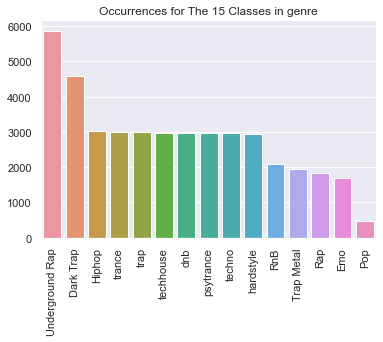

In [9]:
#Frequencies of the target variable in the original dataset
labels, counamts=frequencies(spotify, 'genre')

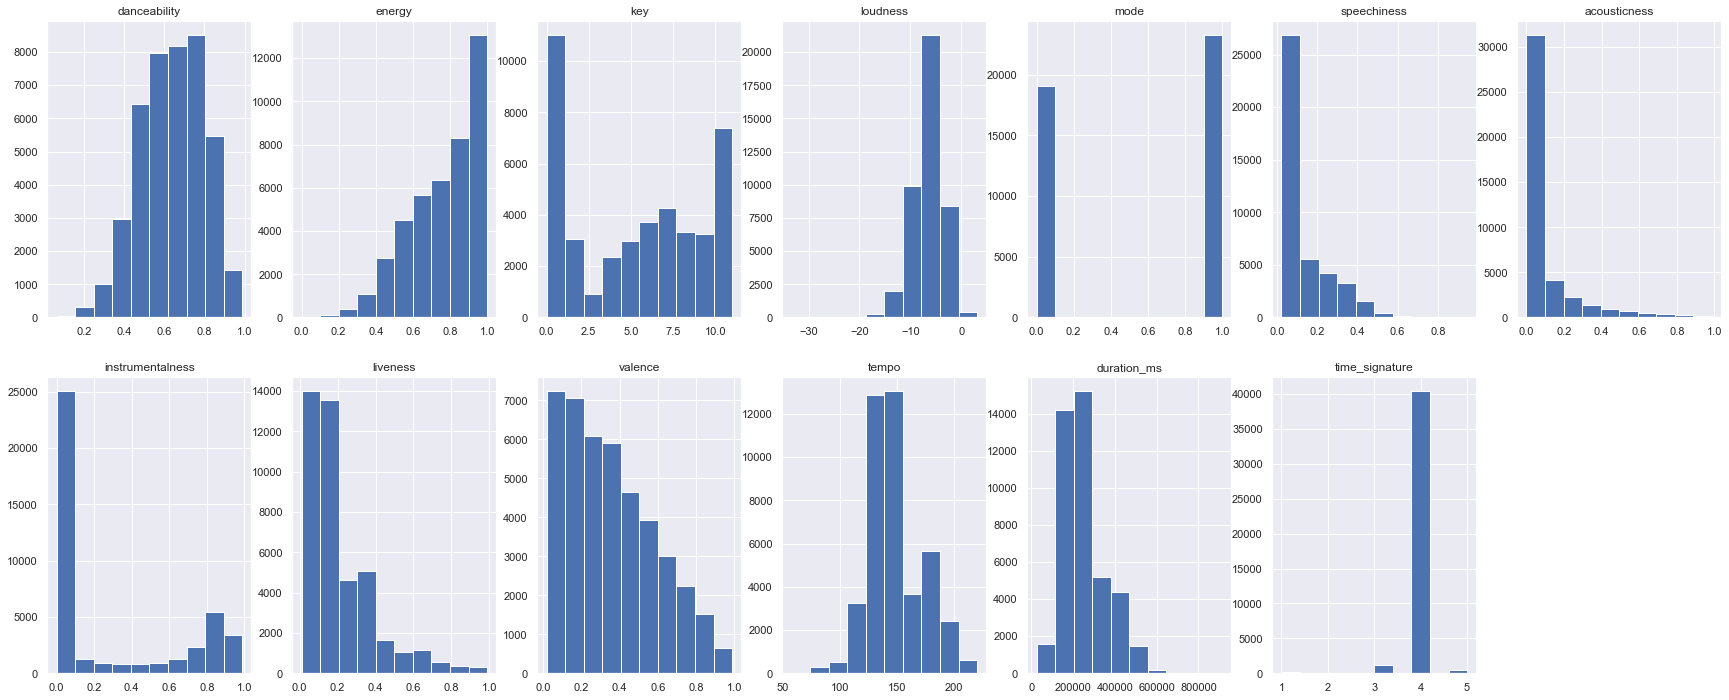

In [10]:
#Histograms for the independent variables in the original dataset
plt.figure(figsize=(30, 12))
for i in list(range(X.shape[1])):
    plt.subplot(2,7, i+1)
    plt.hist(X[:,i])
    plt.title(X_list[i])

### Step 4:
Once we've analysed the data's variables, the next step is to split the DataFrame into train, validation and test datasets.

This is the longest part of the data processing. 

The following actions will be performed:

    - Splitting data into train, val and test;
    - Label encoding;
    - One-Hot encoding;
    - Checking if the data split preserved the distribution integrity of the target variable.

In [11]:
#Split data into train set and test set, and construct the pipeline
test_share=.3
rnd_state=10
train, test=train_test_split(spotify, test_size=test_share, random_state=rnd_state)

continuous_enc=make_pipeline(SimpleImputer(strategy='median'),
                               StandardScaler())
encoder=ColumnTransformer([('process' , continuous_enc , X_list)])

In [12]:
#Data processing on both train and test datasets
x_train=encoder.fit_transform(train)
x_test=encoder.transform(test)
y_train=train[Y_list].to_numpy()
y_test=test[Y_list].to_numpy()

In [13]:
#Splitting a spare validation set (for models without built-in cross-validation)
x_train, x_val , y_train, y_val=train_test_split(x_train,y_train, test_size=test_share/1.5, random_state=rnd_state)

In [14]:
#Quick view at the arrays' dimentions
print('x train dataset:', x_train.shape)
print('x val dataset:', x_val.shape)
print('x test dataset:', x_test.shape)
print('y train dataset:', y_train.shape)
print('y val dataset:', y_val.shape)
print('y test dataset:', y_test.shape)

x train dataset: (23690, 13)
x val dataset: (5923, 13)
x test dataset: (12692, 13)
y train dataset: (23690, 1)
y val dataset: (5923, 1)
y test dataset: (12692, 1)


In [15]:
#Creating and instancing a label encoder
label_enc=LabelEncoder()

#Applying the label encoder
ye_train=label_enc.fit_transform(y_train)
ye_val=label_enc.transform(y_val)
ye_test=label_enc.transform(y_test)


In [16]:
#Creating and instancing a one-hot encoder
one_hot_enc=OneHotEncoder(handle_unknown='ignore', sparse=False)

#Applying the one-hot encoder
y_one_train=one_hot_enc.fit_transform(ye_train.reshape(-1, 1))
y_one_val=one_hot_enc.transform(ye_val.reshape(-1, 1))
y_one_test=one_hot_enc.transform(ye_test.reshape(-1, 1))

In [17]:
def plot_feature_freq(frame, feature, showing=30):
    labels, counts = np.unique(frame[feature].dropna(), return_counts=True)

    p = np.argsort(counts)[::-1]
    labels, counts = labels[p], counts[p]

    g = sns.barplot(labels[:showing], counts[:showing])
    g.set_xticklabels(labels[:showing], rotation=90)
    
    return g

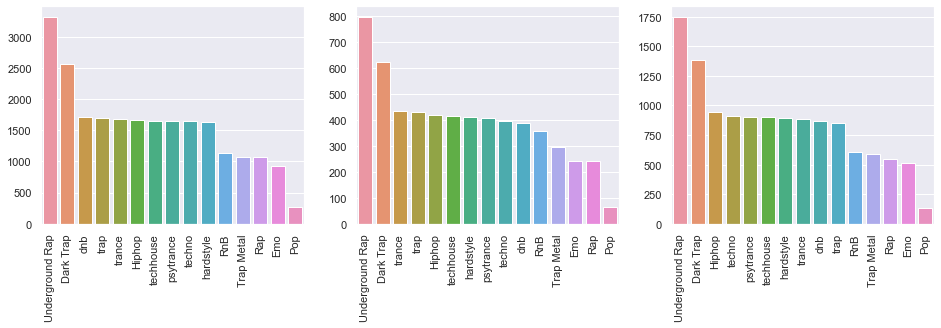

In [18]:
#Plotting the target variable's distribution on the train, validation and test datasets
plt.figure(figsize=(16, 4))

plt.subplot(131)
plot_feature_freq(pd.DataFrame(y_train, columns=Y_list), Y_list[0])

plt.subplot(132)
plot_feature_freq(pd.DataFrame(y_val, columns=Y_list), Y_list[0])

plt.subplot(133)
plot_feature_freq(pd.DataFrame(y_test, columns=Y_list), Y_list[0])

In [19]:
def Metrics(ytrue, ypred, index=[0]):
    
    Acc=metrics.accuracy_score(ytrue, ypred)
    BalAcc=metrics.balanced_accuracy_score(ytrue, ypred)
    F1Score=metrics.f1_score(ytrue, ypred, average='weighted')
    PrecScore=metrics.precision_score(ytrue, ypred, average='weighted')
    RecallScore=metrics.recall_score(ytrue, ypred, average='weighted')

    return pd.DataFrame({'Accuracy':Acc, 'Balanced Accuracy':BalAcc, 
    'F1 Score':F1Score, 'Precision Score':PrecScore, 'Recall Score':RecallScore}, index=index)
    
def CMatrix(y_true, y_pred, labels=None):
    c = metrics.confusion_matrix(y_true, y_pred)
    r = c / c.sum(axis=1, keepdims=True)
    (plt
     .figure(figsize=(16, 12))
     .suptitle('Confusion Matrix', fontsize=20))
    sns.heatmap(r,
                cmap="YlGnBu", linewidths=.5, annot=True, fmt=".1%",
                xticklabels=labels, yticklabels=labels, cbar=False)



## Data Science

### Step 5:

The rest of the work will be focused on applying different algorithms to try and solve our classification problem.

The following classification algorithms will be used:

    - AdaBoost Classifier;
    - Random Forest Classifier (implemented via GridSearch to better fit the hyperparameters);
    - SVMs (Support Vector Machines with both linear and rbf kernels implemented via RandomSearch);
    - Artificial Neural Nets implemented via Keras/Tensorflow API.

##### PS: The hyperparameters search methods use cross-validation. Due to memory drainage, we opted for fewer CVs/Folds.

### AdaBoost Classifier

In [20]:
#Declaring the AdaBoostClassifier algorithm
adaclf=AdaBoostClassifier(n_estimators=100, random_state=rnd_state)

#Fitting the model
adaclf.fit(x_train, ye_train)

AdaBoostClassifier(n_estimators=100, random_state=10)

In [21]:
#Predict model using the validation set
adapredictVal=adaclf.predict(x_val)

#Checking model with cross-validation, specifically 5 folds
adapredictCV=cross_val_score(adaclf, x_train, ye_train, cv=5)

#Predict model using the test set
adapredictTest=adaclf.predict(x_test)

In [22]:
#Displaying the results for the AdaBoost algorithm in the validation dataset
Metrics(ye_val,adapredictVal)

,Accuracy,Balanced Accuracy,F1 Score,Precision Score,Recall Score
0,0.386797,0.334343,0.31707,0.316809,0.386797


In [23]:
#Displaying the cross validation score for the AdaBoost algorithm 
print('Scores for the 5 folds created:\n', [i for i in adapredictCV],'\n')
print('Mean score across the 5 folds created:\n', adapredictCV.mean())

Scores for the 5 folds created:
 [0.33073026593499366, 0.338750527648797, 0.3621781342338539, 0.3216547066272689, 0.3575348248205994] 

Mean score across the 5 folds created:
 0.3421696918531026


In [24]:
#Displaying the results for the AdaBoost algorithm in the test dataset
Metrics(ye_test,adapredictTest)

,Accuracy,Balanced Accuracy,F1 Score,Precision Score,Recall Score
0,0.394816,0.336107,0.325126,0.317645,0.394816


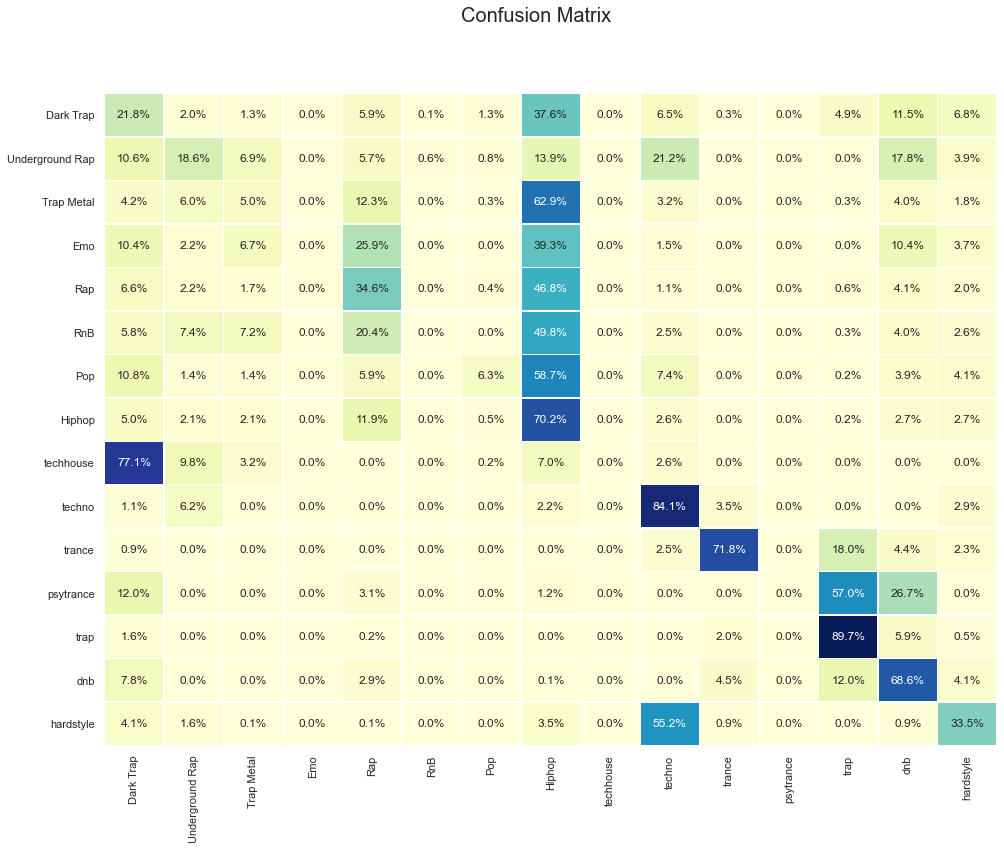

In [25]:
#Displaying the confusion matrix for the AdaBoost algorithm in the test dataset
CMatrix(ye_test, adapredictTest, spotify['genre'].unique())


In [26]:
#Reporting the class weights to better balance the train dataset
class_weights=compute_class_weight('balanced', np.unique(ye_train), ye_train)
train_class_weights=dict(enumerate(class_weights))

### Random Forest Classifier

In [27]:
#Building the Random Forest Classifier
forestclf=RandomForestClassifier(class_weight=train_class_weights , random_state=rnd_state, criterion='gini', max_features='sqrt')

#Constructing the hash-table for the Grid
n_trees=[int(i) for i in np.linspace(100, 2500, 4)]
param_grid=dict(n_estimators=n_trees)

#Constructing the GridSearch Structure
gridRndForest=GridSearchCV(forestclf, param_grid, cv=2, scoring='balanced_accuracy')

In [28]:
#Fitting the model
gridRndForest.fit(x_train, ye_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(class_weight={0: 0.6152447734060512,
                                                            1: 1.701867816091954,
                                                            2: 0.9502607300441236,
                                                            3: 6.051085568326948,
                                                            4: 1.482942097026604,
                                                            5: 1.3902582159624413,
                                                            6: 1.47601246105919,
                                                            7: 0.4749874686716792,
                                                            8: 0.9241271698849229,
                                                            9: 0.9665442676458589,
                                                            10: 0.9571717171717171,
                                                            11: 0.953703

In [29]:
#Selection of the best model
print('Number of trees of the best estimator in the grid:\n', gridRndForest.best_params_)

Number of trees of the best estimator in the grid:
 {'n_estimators': 2500}


In [30]:
#Predict model using the validation set
rndForestpredictVal=gridRndForest.best_estimator_.predict(x_val)

#Predict model using the test set
rndForestpredictTest=gridRndForest.best_estimator_.predict(x_test)

In [31]:
#Displaying the results for the Random Forest algorithm in the validation dataset
Metrics(ye_val, rndForestpredictVal)

,Accuracy,Balanced Accuracy,F1 Score,Precision Score,Recall Score
0,0.659801,0.624068,0.653297,0.65448,0.659801


In [32]:
#Displaying the results for the Random Forest algorithm in the test dataset
Metrics(ye_test, rndForestpredictTest)

,Accuracy,Balanced Accuracy,F1 Score,Precision Score,Recall Score
0,0.661204,0.624233,0.656074,0.657517,0.661204


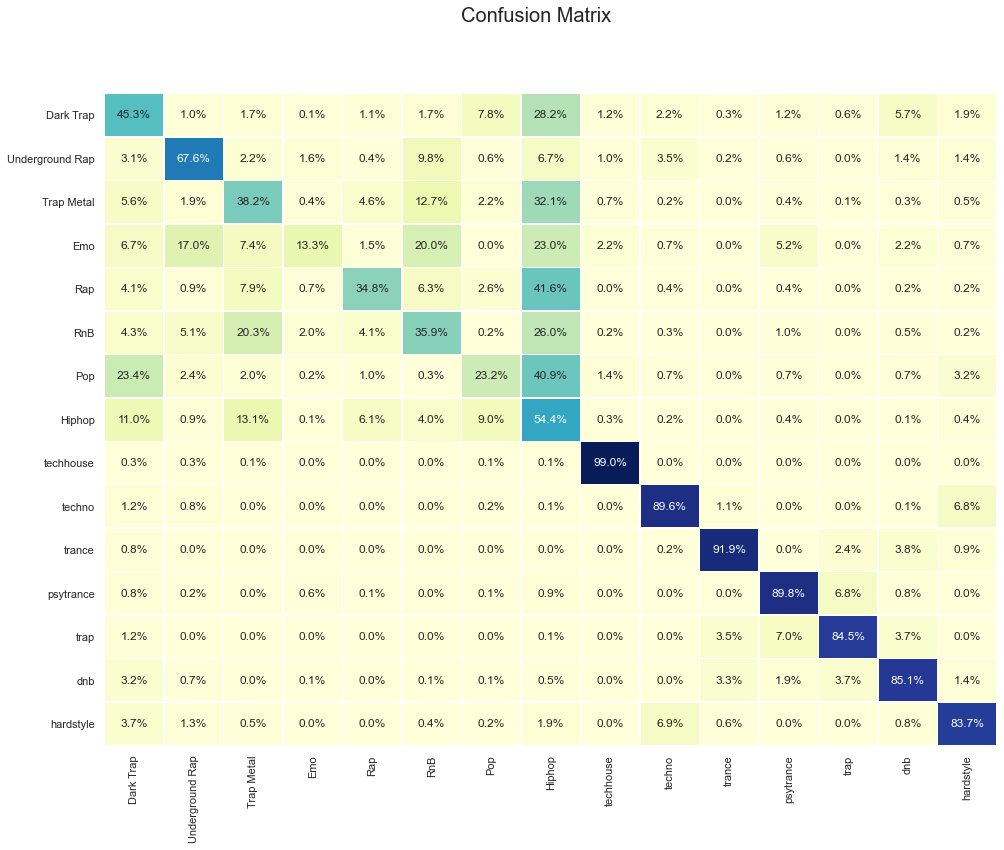

In [33]:
#Displaying the confusion matrix for the Random Forest algorithm in the test dataset
CMatrix(ye_test, rndForestpredictTest, spotify['genre'].unique())

### SVM Classifiers

In [34]:
#Instancing the SVM Classifiers
SVM_linear=SVC(random_state=rnd_state, class_weight=train_class_weights, kernel='linear')
SVM_rbf=SVC(random_state=rnd_state, class_weight=train_class_weights, kernel='rbf')

#Constructing the hash-table for the Grids
C_range=np.logspace(-1,3,5)
gamma_range=np.logspace(-3,5,5)
param_grid=dict(C=C_range,gamma=gamma_range)

In [35]:
#Constructing the RandomizedSearch structure with cross-validation
gridSVM_linear=RandomizedSearchCV(SVM_linear, param_distributions=param_grid, n_iter=5 , cv=2, random_state=rnd_state , scoring='balanced_accuracy')

In [36]:
#Constructing the RandomizedSearch Structure with cross-validation
gridSVM_rbf=RandomizedSearchCV(SVM_rbf, param_distributions=param_grid, n_iter=5 , cv=2, random_state=rnd_state , scoring='balanced_accuracy')

In [37]:
#Fitting the Linear model
gridSVM_linear.fit(x_train, ye_train)

RandomizedSearchCV(cv=2,
                   estimator=SVC(class_weight={0: 0.6152447734060512,
                                               1: 1.701867816091954,
                                               2: 0.9502607300441236,
                                               3: 6.051085568326948,
                                               4: 1.482942097026604,
                                               5: 1.3902582159624413,
                                               6: 1.47601246105919,
                                               7: 0.4749874686716792,
                                               8: 0.9241271698849229,
                                               9: 0.9665442676458589,
                                               10: 0.9571717171717171,
                                               11: 0.9537037037037037,
                                               12: 0.9594977723774808,
                                               13: 0.94119984108065

In [38]:
#Fitting the RBF model
gridSVM_rbf.fit(x_train, ye_train)

RandomizedSearchCV(cv=2,
                   estimator=SVC(class_weight={0: 0.6152447734060512,
                                               1: 1.701867816091954,
                                               2: 0.9502607300441236,
                                               3: 6.051085568326948,
                                               4: 1.482942097026604,
                                               5: 1.3902582159624413,
                                               6: 1.47601246105919,
                                               7: 0.4749874686716792,
                                               8: 0.9241271698849229,
                                               9: 0.9665442676458589,
                                               10: 0.9571717171717171,
                                               11: 0.9537037037037037,
                                               12: 0.9594977723774808,
                                               13: 0.94119984108065

In [39]:
#Predict linear SVM model using the validation set
svmlinearpredictVal=gridSVM_linear.best_estimator_.predict(x_val)

#Predict linear SVM model using the test set
svmlinearpredictTest=gridSVM_linear.best_estimator_.predict(x_test)

In [40]:
#Predict RBF SVM model using the validation set
svmrbfpredictVal=gridSVM_rbf.best_estimator_.predict(x_val)

#Predict RBF SVM model using the test set
svmrbfpredictTest=gridSVM_rbf.best_estimator_.predict(x_test)

In [41]:
#Printing the best selected models for each SVM
print('RBF Model:', gridSVM_rbf.best_params_)
print('Linear Model:', gridSVM_rbf.best_params_)

RBF Model: {'gamma': 0.1, 'C': 0.1}
Linear Model: {'gamma': 0.1, 'C': 0.1}


In [42]:
#Checking the SVMs' results on both validation and test datasets
pd.concat([Metrics(ye_val, svmlinearpredictVal, ['Linear SVM - Val']), Metrics(ye_val, svmrbfpredictVal, ['RBF SVM - Val']), Metrics(ye_test, svmlinearpredictTest, ['Linear SVM - Test']), Metrics(ye_test, svmrbfpredictTest, ['RBF SVM - Test'])])

,Accuracy,Balanced Accuracy,F1 Score,Precision Score,Recall Score
Linear SVM - Val,0.596151,0.611938,0.601813,0.630498,0.596151
RBF SVM - Val,0.582306,0.604929,0.583998,0.607166,0.582306
Linear SVM - Test,0.600693,0.606868,0.606759,0.635873,0.600693
RBF SVM - Test,0.585723,0.590774,0.589126,0.614235,0.585723


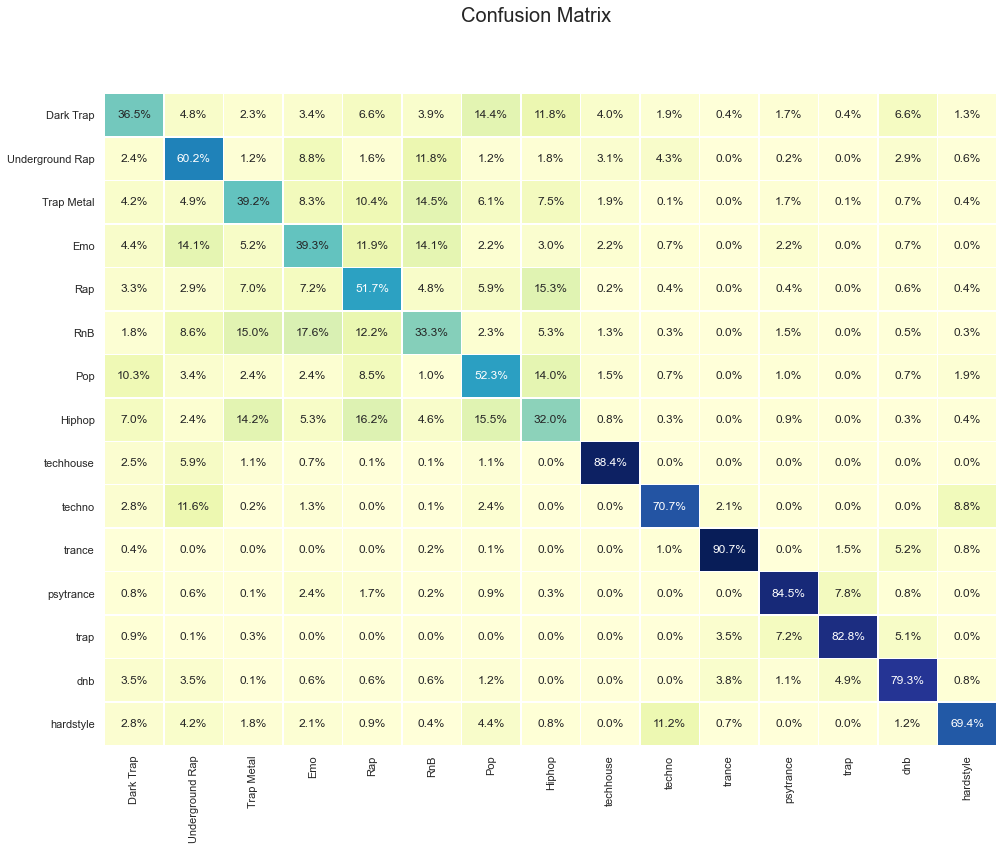

In [43]:
#Plotting the confusion matrix on the test dataset for the best SVM model
CMatrix(ye_test, svmlinearpredictTest, spotify['genre'].unique())

### Artificial Neural Nets

In [44]:
#Setting up model params
epochs = 100
batch_size = 32
input_shape=(x_train.shape[1],)

In [45]:
#Building the Artificial Neural Net's topography with Dropout
NN1 = Sequential()
NN1.add(Dense(512, activation='relu', input_shape=input_shape))
NN1.add(Dense(256, activation='relu', kernel_constraint=maxnorm(3)))
NN1.add(Dropout(0.1))
NN1.add(Dense(256, activation='relu', kernel_constraint=maxnorm(3)))
NN1.add(Dropout(0.1))
NN1.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
NN1.add(Dropout(0.1))
NN1.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
NN1.add(Dropout(0.1))
NN1.add(Dense(15, activation='softmax'))

In [46]:
NN1.build()
NN1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               7168      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

In [47]:
#Compiling the NN: 
    # Categorical Crossentropy as loss function
    # Stochastic Gradient Descent (SGD) optimizers
sgd = optimizers.SGD(lr=0.01, momentum=0.1)
NN1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [48]:
#Fitting neural net and saving its model's weights through 'ModelCheckpoint' method
filepath='weights.h5'
device = '/cpu:0'
with tf.device(device):
    NN1.fit(x_train, y_one_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  class_weight = train_class_weights,
                  validation_data=(x_val, y_one_val),
                  verbose=1, 
                  callbacks=[callbacks.TerminateOnNaN(), 
                             callbacks.ModelCheckpoint(filepath, save_best_only=True, verbose=1)])

1 [==============================] - 6s 9ms/step - loss: 1.8245 - accuracy: 0.3629 - val_loss: 1.4085 - val_accuracy: 0.5082

Epoch 00002: val_loss improved from 1.94294 to 1.40852, saving model to weights.h5
Epoch 3/100
741/741 [==============================] - 7s 9ms/step - loss: 1.4488 - accuracy: 0.4889 - val_loss: 1.2669 - val_accuracy: 0.5563

Epoch 00003: val_loss improved from 1.40852 to 1.26694, saving model to weights.h5
Epoch 4/100
741/741 [==============================] - 6s 9ms/step - loss: 1.2967 - accuracy: 0.5427 - val_loss: 1.1766 - val_accuracy: 0.5857

Epoch 00004: val_loss improved from 1.26694 to 1.17660, saving model to weights.h5
Epoch 5/100
741/741 [==============================] - 6s 9ms/step - loss: 1.2375 - accuracy: 0.5553 - val_loss: 1.1451 - val_accuracy: 0.5978

Epoch 00005: val_loss improved from 1.17660 to 1.14514, saving model to weights.h5
Epoch 6/100
741/741 [==============================] - 7s 9ms/step - loss: 1.1835 - accuracy: 0.5715 - val_los

In [49]:
#Loading model's weights
NN1.load_weights('weights.h5')

In [50]:
#Saving training history into a Pandas DataFrame
history_f=pd.DataFrame(NN1.history.history)

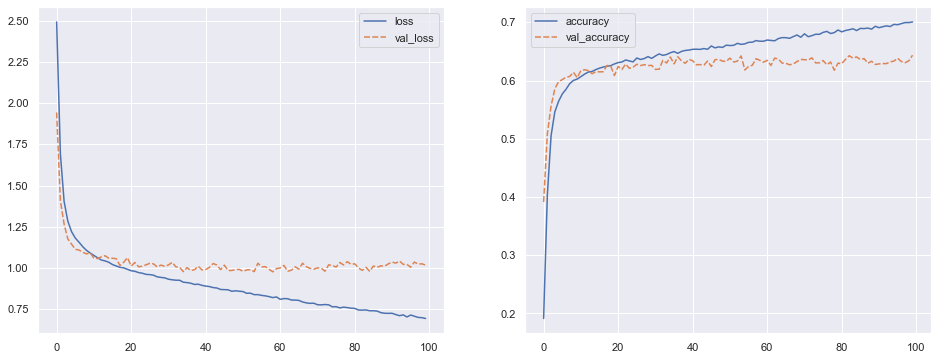

In [51]:
#Graph showing the 'loss' function values
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.lineplot(data=history_f.loc[:, ['loss', 'val_loss']])

#Graph showing the accuracy values
plt.subplot(122)
sns.lineplot(data=history_f.loc[:, ['accuracy', 'val_accuracy']])

In [52]:
NNpredictTest=np.argmax(NN1.predict(x_test), axis=-1)

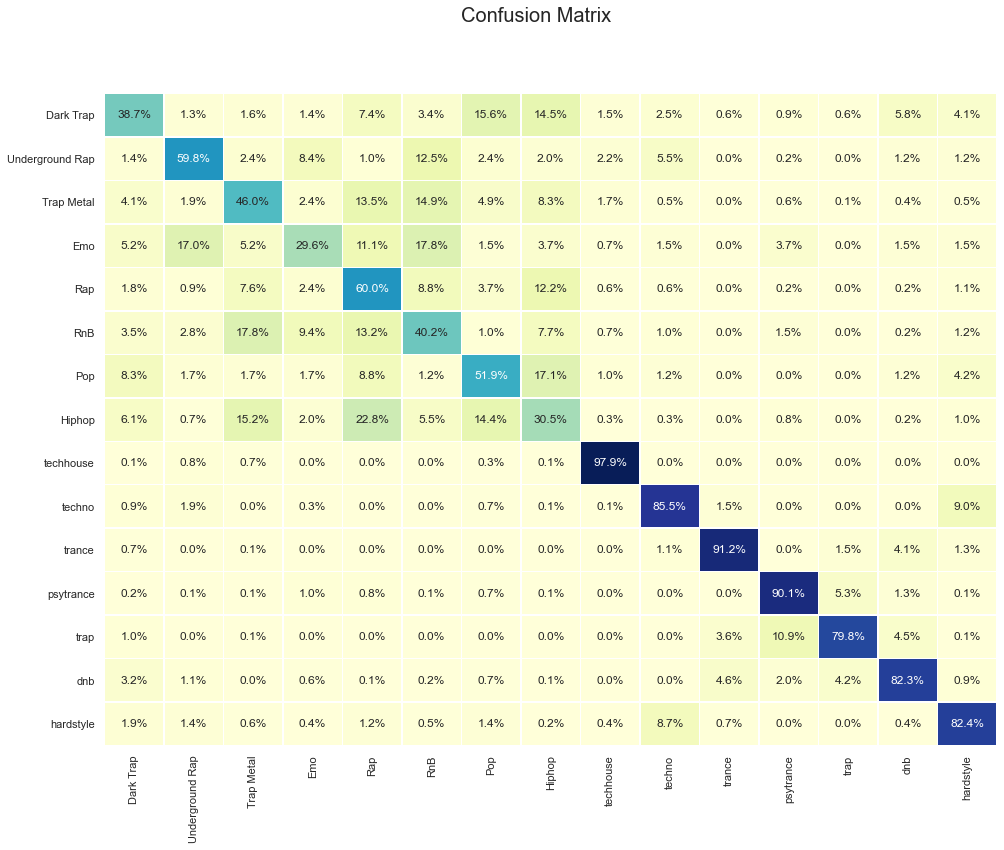

In [53]:
CMatrix(ye_test, NNpredictTest, spotify['genre'].unique())

## Final Analysis:

Given that we've applied several algorithms to solve this classification problem, now we may check which one of them presented the best results, mainly on the test dataset. 

It's important mentioning that the test set is our benchmark because it is a blind dataset by definition. In that sense, a dataset of this kind yields valuable information about model overfitting.

Therefore, the first algorithm, AdaBoost, consists in fitting an estimator to classify our data, and then recursively creating copies of that estimator but having the weights of incorrectly classified instances adjusted so that the subsequent classifiers focus more on the classes who are more difficult to predict.

The second algorithm is a Random Forest Classifier. It creates a number of decision trees with the dataset's samples and averages it to improve accuracy and prevent overfitting. The criterion we used for this problem was the 'Gini impurity'.

The third algorithm was a series of SVMs, with both RBF and Linear kernels. Just like the Random Forest, we decided to use a formal hyperparameter search scheme.  

Our last algorithm was a Keras Artificial Neural Net. Thus, in order to minimize and control overfitting, we opted to use Dropout on several layers of the net. The applied 'loss' function to be minimized was the 'Categorical Crossentropy' on the validation set, and the chosen optimizer was SGD, which stands for 'Stochastic Gradient Descent'.

Having all that in mind, the algorithms that achieved the best results were the Support Vector Machine, with the linear kernel, and the Artificial Neural Nets. 

Finally, we evaluate that the Artificial Neural Net is the best estimator for the given problem.